In [1]:
from data_module import correlator as correlator
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as io
from astropy.table import Table as table

In [2]:
ne15 = io.read('NE2001_1500.csv',data_start=2)
ne8 = io.read('NE2001_820.csv',data_start=2)
dist15 = io.read('Dist_1500.csv',data_start=2)
dist8 = io.read('Dist_820.csv',data_start=2)
atnf = io.read('atnf.csv',data_start=2,guess=True)

In [3]:
# ne8.rename_column('Dist (NE2001)','Dist')
# ne8.rename_column('Scint time (s)','Time')
# ne15.rename_column('Dist (NE2001)','Dist')
# ne15.rename_column('Scint time (s)','Time')
ne8[0:3]

PSRJ,Gl,Gb,DM,Dist (NE2001),log SM,Ang Broad,Pulse Broad,Scint Bandw,Scint time (s),Trans Freq,EM
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J0218+4232,139.508,-17.527,61.25,2.67,-3.29,1.12,0.98,0.33,255.209,13.87,0.28
J0340+4130,153.783,-11.022,49.59,1.731,-3.2,1.04,0.7,0.45,242.599,13.89,0.34
J0613-0200,210.413,-9.305,38.78,1.706,-3.58,0.35,0.23,1.37,419.226,10.84,0.14


In [4]:
atnf[4]['S1400'] = 1
atnf[8]['S1400'] = 1

-0.35372813392306984
-0.4768346176234487


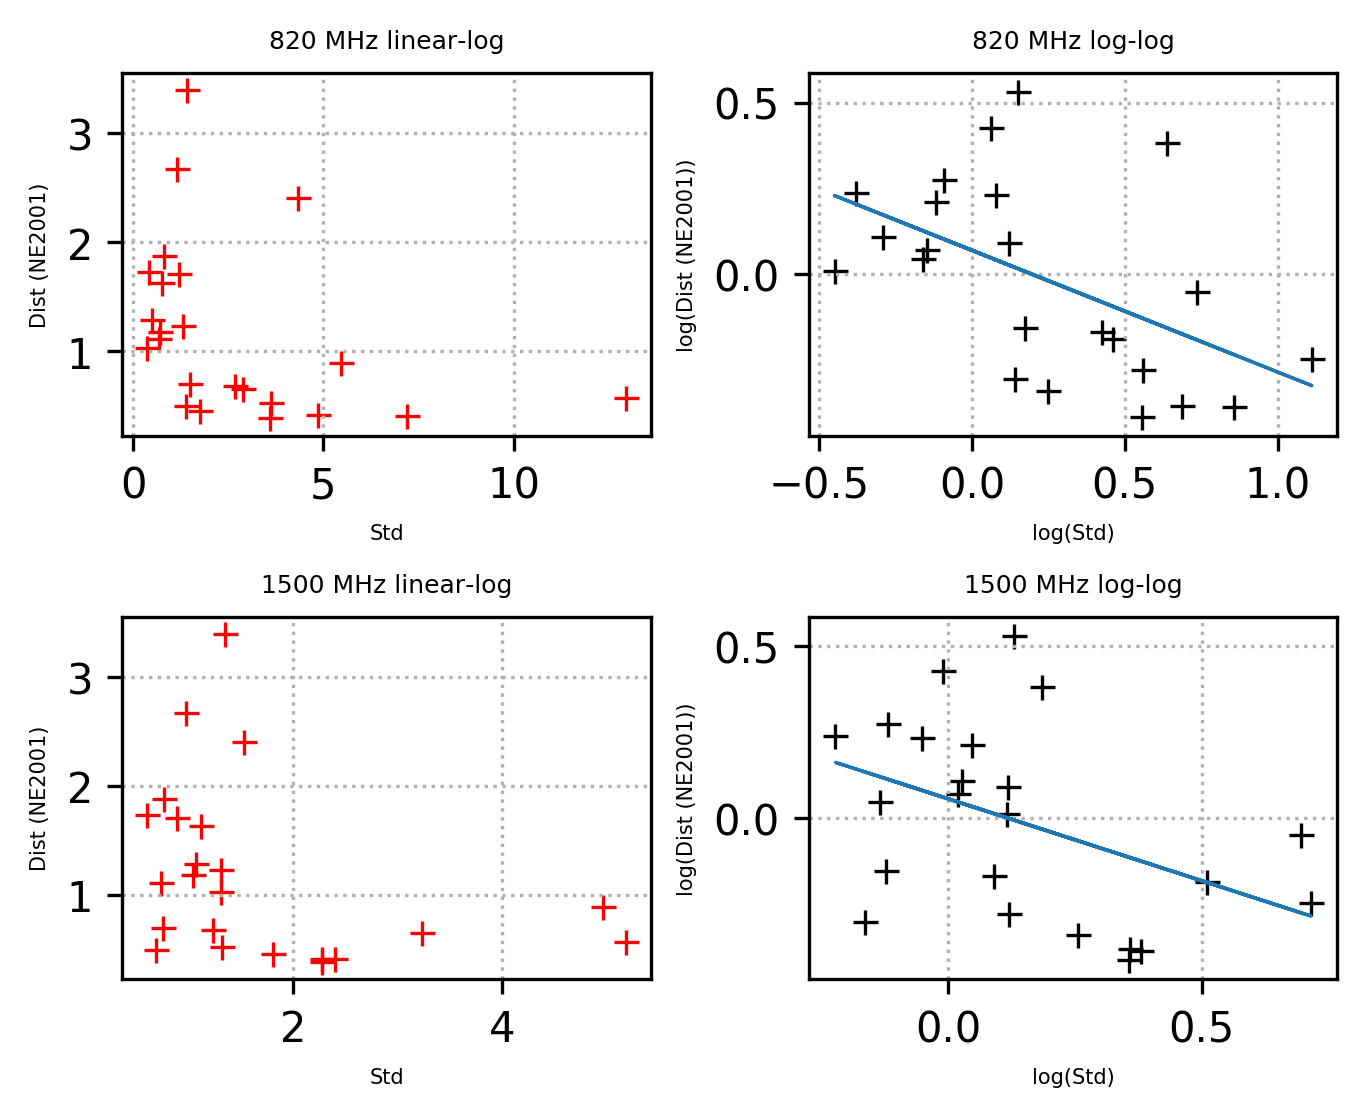

In [9]:
correlator('Std','Dist (NE2001)')

In [6]:
# import matplotlib.colorbar as cb

0.34810710322263266


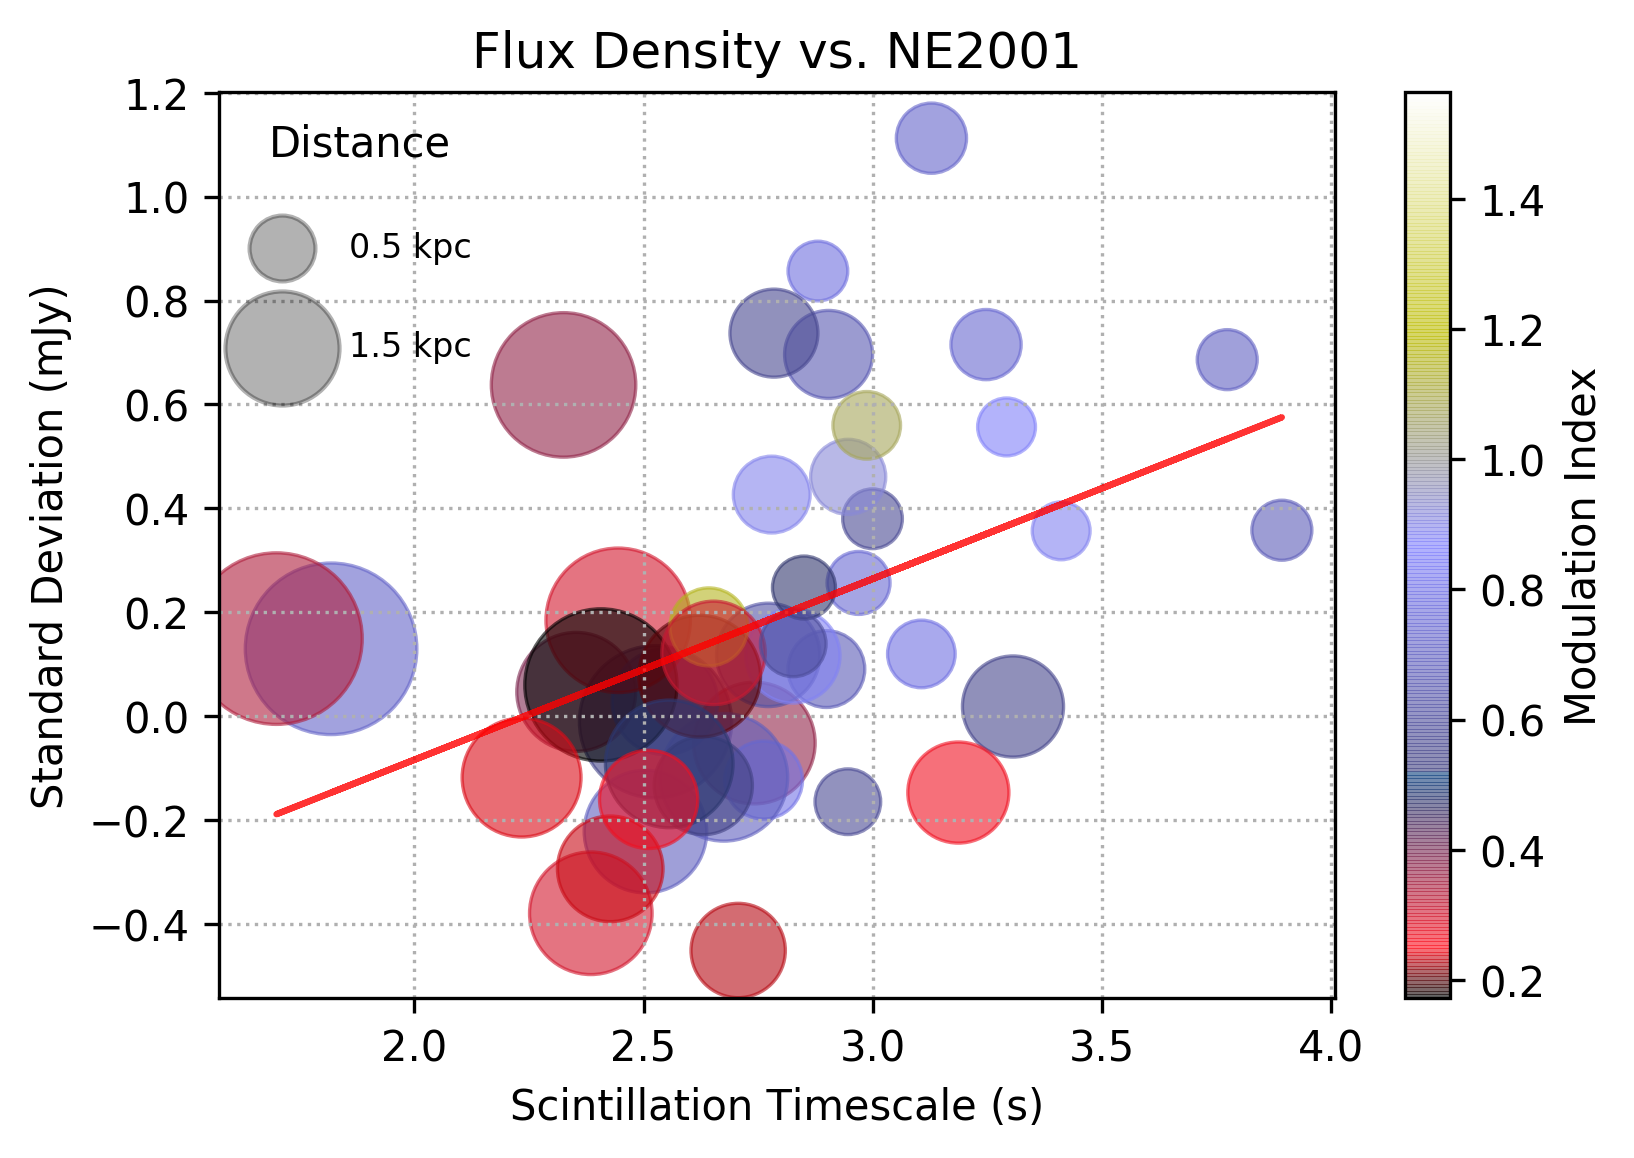

In [141]:
### Define axes and size/color data
lab1 = 'Scint time (s)' # y axis
lab2 = 'Std' #x axis
lab3 = 'Mod Index' # color axis
lab4 = 'Dist (NE2001)' #size axis

### Define x and y
x=[]
for item in ne15[lab1]:
    x.append(item)
for item in ne8[lab1]:
    x.append(item)

y=[]
for item in dist15[lab2]:
    y.append(item)
for item in dist8[lab2]:
    y.append(item)


### simple way of defining data
# x = ne15[lab1],ne8[lab1]
# y = dist15[lab2],dist8[lab2]
colors= 1*dist15[lab3],1*dist8[lab3]
sizes = 500*ne15[lab4],500*ne8[lab4]
# print (sizes)
# sizer = [np.median(sizes),np.min(sizes)]
# print (sizer)

### take the log of the axes data
logx = np.log10(x)  
logy = np.log10(y)  


### Plot
plt.scatter(logx,logy,c = colors, marker='o',linewidth=.8,cmap='gist_stern',alpha =.6,s = sizes)#,label='Relative Size')
# ax = point.plot(x='x', y='y', ax=ax, style='bx', label='point') 

fyt = np.polyfit(logx,logy,1)
print (fyt[0])
line = fyt[0]*logx + fyt[1]
plt.plot(logx,line, color='red',alpha=.8)


# plt.legend()
plt.ylabel('Standard Deviation (mJy)')
plt.xlabel('Scintillation Timescale (s)')
# plt.xlabel('Scintillation Timescale (s) \nSize = Distance in kpc')
plt.title('Flux Density vs. NE2001')
plt.grid(True)
plt.grid(linestyle='dotted')
plt.colorbar(label='Modulation Index')

for distance in [250,750]:
    plt.scatter([], [], c='k', alpha=0.3, s=distance, label=str(distance/500) + ' kpc')
    continue
leg = plt.legend( fontsize=8, frameon=False, loc=2, labelspacing=2,handletextpad=1)#, title='Distance')
leg.set_title("Distance", prop = {'size':10})

plt.show()

In [4]:
# dist8[0:]
# dist8.colnames
def a_stat(t):    
    a_mean,a_std = np.mean(t),np.std(t)
    return (a_mean,a_std)
    
a8, a15 = a_stat(dist8['a']), a_stat(dist15['a'])
print (a8,'\n', a15)

(1.2456521739130437, 0.70367251577121859) 
 (1.0178260869565217, 0.075236237900254854)


In [217]:
ne15#[0:2]

PSRJ,Gl,Gb,DM,Dist (NE2001),log SM,Ang Broad,Pulse Broad,Scint Bandw,Scint time (s),Trans Freq,EM
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J0218+4232,139.508,-17.527,61.25,2.67,-3.29,0.3,0.07,1.52,335.825,13.87,0.28
J0340+4130,153.783,-11.022,49.59,1.731,-3.2,0.28,0.05,2.12,319.232,13.89,0.34
J0613-0200,210.413,-9.305,38.78,1.706,-3.58,0.09,0.02,6.42,551.652,10.84,0.14
J0645+5158,163.963,20.251,18.25,0.701,-3.67,0.11,0.00611,17.13,577.743,7.49,0.12
J0740+6620,149.73,29.599,14.96,0.68,-3.87,0.07,0.00315,33.2,792.248,6.45,0.07
J0931-1902,250.999,23.054,41.49,1.877,-3.55,0.16,0.02,4.29,473.377,10.75,0.15
J1012+5307,160.347,50.858,9.02,0.411,-4.04,0.06,0.0012,87.28,999.057,4.81,0.05
J1024-0719,251.702,40.515,6.48,0.386,-4.46,0.01,0.00017,619.65,2577.901,3.58,0.02
J1125+7819,128.289,37.895,11.73,0.65,-4.07,0.05,0.0014,74.82,1163.302,5.5,0.05


In [215]:
ne8[0:2]

PSRJ,Gl,Gb,DM,Dist (NE2001),log SM,Ang Broad,Pulse Broad,Scint Bandw,Scint time (s),Trans Freq,EM
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J0218+4232,139.508,-17.527,61.25,2.67,-3.29,1.12,0.98,0.33,255.209,13.87,0.28
J0340+4130,153.783,-11.022,49.59,1.731,-3.2,1.04,0.7,0.45,242.599,13.89,0.34


In [13]:
# atnf[0:]

In [216]:
dist15[0:2]

PSRJ,Mean,Std,Min,Max,len,Median,Mod Index,a,b,DOF,Goodness of fit,Std Factor,Notes
str10,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,str3
J0218+4232,1.784010252,0.9760866705,0.3336499547,4.688181271,64,1.544148335,0.5471306398,0.95,7.3,7,--,5,--
J0340+4130,0.8677898963,0.6000078198,0.02678565823,3.621546106,351,0.7247536685,0.6914206105,1.04,3.79,4,--,3,--


0.272694745168
0.47042586972


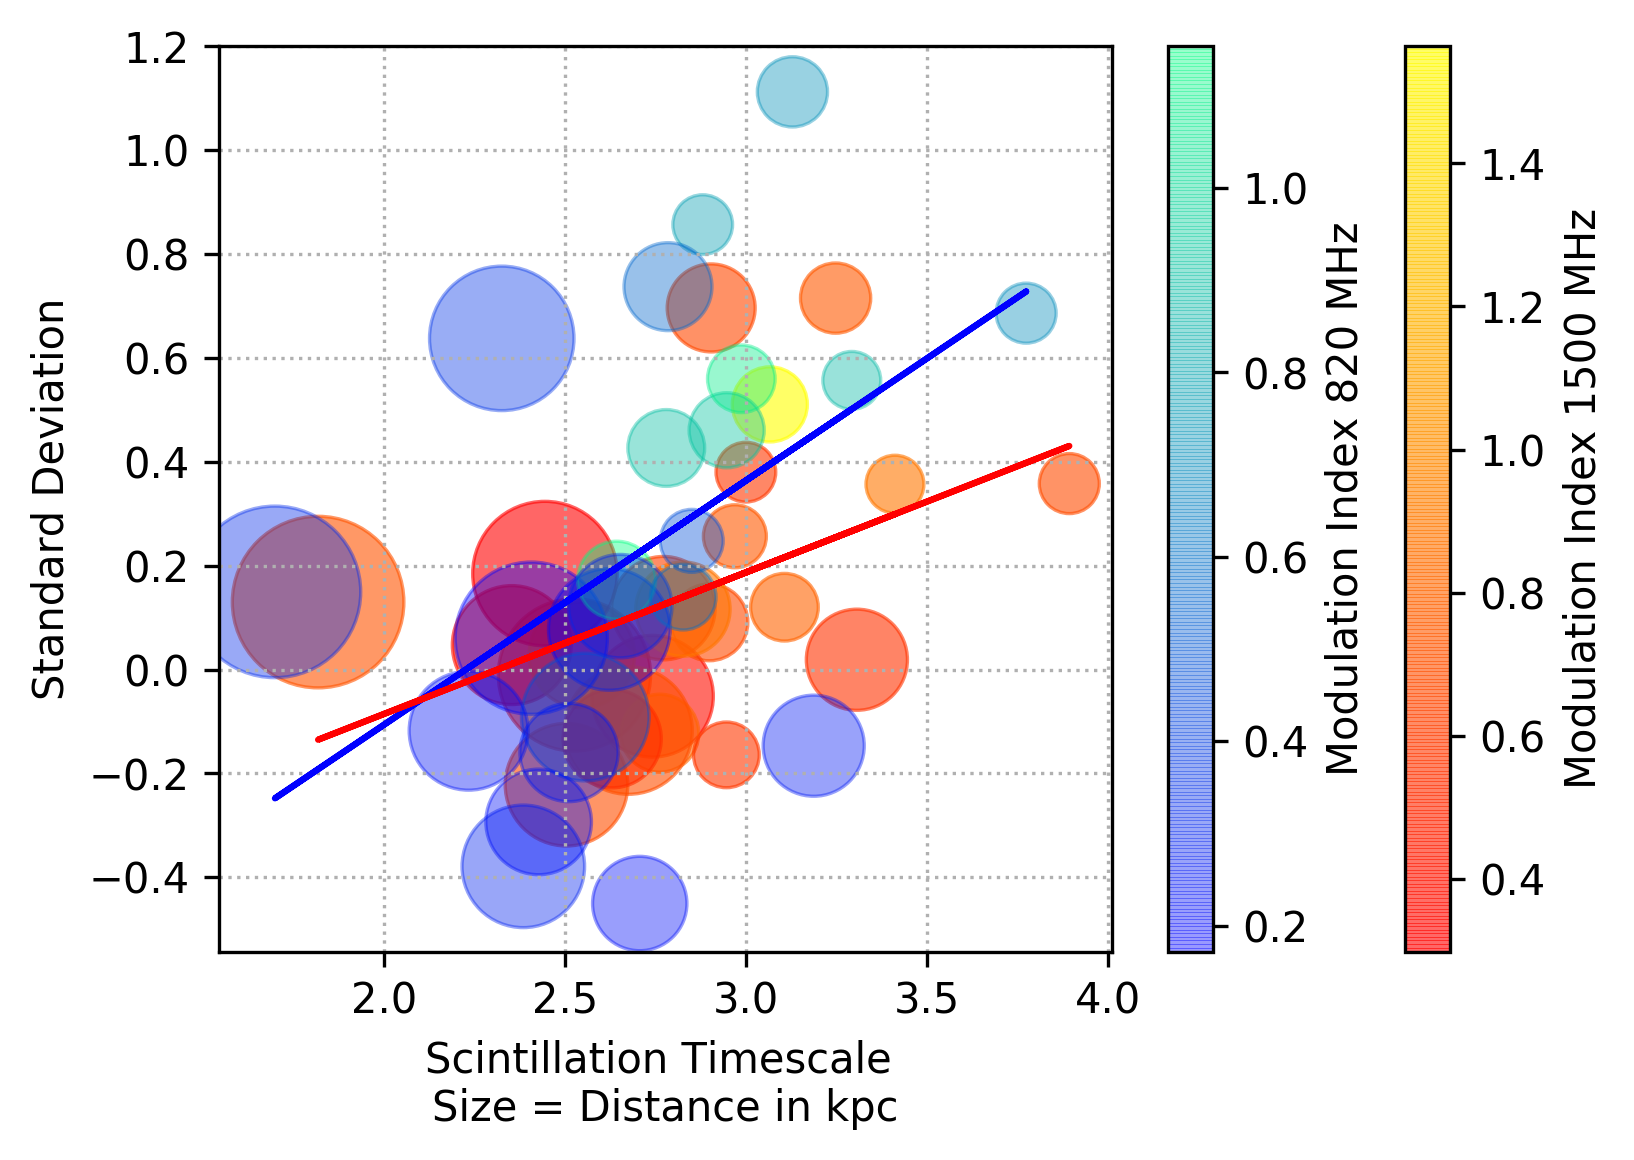

In [212]:
### Define axes and size/color data
lab1 = 'Scint time (s)' # y axis
lab2 = 'Std' #x axis
lab3 = 'Mod Index' # Size axis
lab4 = 'Dist (NE2001)' #color axis

# x=[]
# for item in ne15[lab1]:
#     x.append(item)
# for item in ne8[lab1]:
#     x.append(item)

# y=[]
# for item in dist15[lab2]:
#     y.append(item)
# for item in dist8[lab2]:
#     y.append(item)

# colors=[]
# for item in dist15['DOF']:
#     colors.append(item)
# for item in dist8['DOF']:
#     colors.append(item)

# sizes = []
# for item in ne15[lab4]:
#     sizes.append(item)
# for item in ne8[lab4]:
#     sizes.append(item)

x = ne15[lab1]
xx = ne8[lab1]
y = dist15[lab2]
yy =dist8[lab2]
colors= 1*dist15[lab3]#,1*dist8[lab3]
colors2 = 1*dist8[lab3]
sizes = 500*ne15[lab4]#,500*ne8[lab4]
sizes2= 500*ne8[lab4]

### take the log of the axes data
xx = np.log10(xx)
yy = np.log10(yy)
x = np.log10(x)  
y = np.log10(y)  

### Plot
plt.scatter(x,y,c = colors, marker='o',linewidth=.8,cmap='autumn',alpha =.6,s = sizes)
plt.colorbar(label='Modulation Index 1500 MHz')
plt.scatter(xx,yy,c = colors2, marker='o', linewidth=.8, cmap='winter',alpha=.4,s=sizes2)
fyt = np.polyfit(x,y,1)
fyte = np.polyfit(xx,yy,1)
print (fyt[0])
print (fyte[0])
line2 = fyte[0]*xx + fyte[1]
line = fyt[0]*x + fyt[1]
plt.plot(xx,line2,color='blue')
plt.plot(x,line, color='red')
# plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='City Area')
plt.xlabel('Scintillation Timescale \nSize = Distance in kpc')
plt.ylabel('Standard Deviation')
plt.grid(linestyle='dotted')
plt.colorbar(label='Modulation Index 820 MHz')
plt.show()